## Logistic Regression

In [1]:
import pandas as pd

In [2]:
#Loading the dataset into a dataframe named df
df = pd.read_csv('titanic_prepared_data.csv')
#Shows top 5 rows of the data set
df.head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,FamilySize
0,0,1,22.0,0,0,1,0,0,1,2
1,1,0,38.0,1,0,0,1,0,0,2
2,1,0,26.0,0,0,1,0,0,1,1
3,1,0,35.0,1,0,0,0,0,1,2
4,0,1,35.0,0,0,1,0,0,1,1


#### Separating Features and Labels

In [3]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0:1].values
print X.shape, Y.shape

(891L, 9L) (891L, 1L)


#### Splitting into Train and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print X_train.shape, Y_train.shape

(623L, 9L) (623L, 1L)


#### Importing the model followed by training, prediction and calculation of accuracy score

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train, Y_train.ravel()) 
Y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( accuracy_score(Y_pred_log_reg, Y_test) * 100, 2)
print (str(acc_log_reg) + ' %')

80.22 %


In [6]:
print Y_train.shape

(623L, 1L)


In [7]:
print Y_train.ravel().shape

(623L,)


#### Regularisation Constant

In [8]:
clf2 = LogisticRegression(C=0.08)
clf2.fit(X_train, Y_train.ravel()) #ravel() converts the shape of y_train to the required type
Y_pred_log_reg2 = clf2.predict(X_test)
acc_log_reg2 = round( accuracy_score(Y_pred_log_reg2, Y_test) * 100, 2)
print (str(acc_log_reg2) + ' %')

82.09 %


## k - Nearest Neighbors (K-NN)

#### Importing the model followed by training, prediction and calculation of accuracy score

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train.ravel())
Y_pred_knn = clf.predict(X_test)
acc_knn = round(accuracy_score(Y_pred_knn, Y_test) * 100, 2)
print (str(acc_knn) + ' percent')

77.24 percent


## Gaussian Naive Bayes

#### Importing the model followed by training, prediction and calculation of accuracy score

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, Y_train.ravel())
Y_pred_gnb = clf.predict(X_test)
acc_gnb = round(accuracy_score(Y_pred_gnb, Y_test) * 100, 2)
print (str(acc_gnb) + ' percent')

76.49 percent


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train.ravel())
Y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_pred_decision_tree, Y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

76.87 percent


## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=500)
clf.fit(X_train, Y_train.ravel())
Y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(accuracy_score(Y_pred_random_forest, Y_test) * 100, 2)
print (str(acc_random_forest) + ' percent')

78.36 percent


# Performance Analysis : Logistic Regression vs Random Forest

In [13]:
if acc_log_reg > acc_random_forest:
    x = acc_log_reg - acc_random_forest
    print 'Logistic Regression gives more accurate result with an accuracy of %s percent' % acc_log_reg
    print '\nAccuracy difference : %s' %x
elif acc_log_reg < acc_random_forest:
    x = acc_random_forest - acc_log_reg
    print 'Random Forest Classifier gives more accurate result with an accuracy of %s percent' % acc_random_forest
    print '\nAccuracy difference : %s' %x
else:
    print 'Logistic Regression and Random Forest Classifier give same accuracy of %s percent' % m

Logistic Regression gives more accurate result with an accuracy of 80.22 percent

Accuracy difference : 1.86


# Comparing Models

In [14]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-NN', 'Decision Tree', 
              'Random Forest', 'Gaussian Naive Bayes'],
    
    'Score': [acc_log_reg, acc_knn,  acc_decision_tree, 
              acc_random_forest, acc_gnb]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.22
3,Random Forest,78.36
1,K-NN,77.24
2,Decision Tree,76.87
4,Gaussian Naive Bayes,76.49


# Above & Beyond : Plotting bar graphs of acccuracy scores

In [15]:
#dictionary to plot bar graph
classifiers = {'Logistic Regression':acc_log_reg,
              'K Nearest Neghbour':acc_knn,
              'Gaussian Naive Bayes':acc_gnb,
              'Decision Tree':acc_decision_tree,
              'Random Forest':acc_random_forest}

In [16]:
# ************************** DATA VISUALIZATION *********************************************************************************
#used for plotting graphs
import matplotlib.pyplot as plt 
#used to display graphs in ipython notebook only
%matplotlib inline
#ease the task of coding with matplotlib
import seaborn as sns
#initialization of seaborn's object
sns.set()

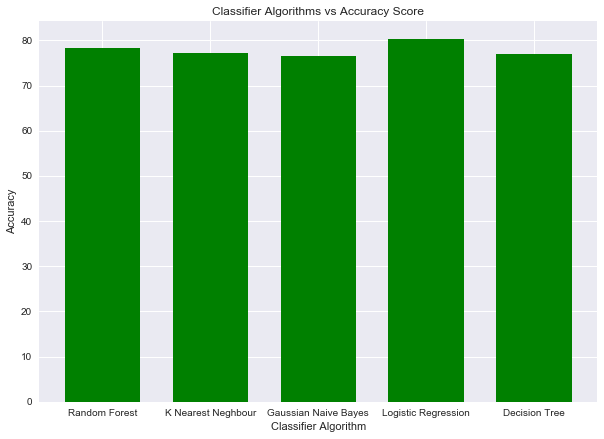

In [17]:
# ********************** PLOT USING MATPLOTLIB **********************************************************************************
#plot bar graph for differnt classification algorithms and their accuracy score
#set the layout of graph frame
plt.figure(figsize=(10, 7))
#set layout of bars
plt.bar(range(len(classifiers)), classifiers.values(),align='center', width=0.7, color = 'g')
#set labels at x axis
plt.xticks(range(len(classifiers)), classifiers.keys())
#gives name to x axis
plt.xlabel('Classifier Algorithm')
#gives name to y axis
plt.ylabel('Accuracy')
#gives title to the graph
plt.title('Classifier Algorithms vs Accuracy Score')
#prints the graph
plt.show()

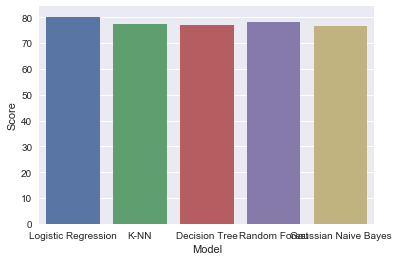

In [18]:
# ****************************** PLOT USING SEABORN *****************************************************************************
#Bar Graph for models and accuracy score
p = sns.barplot(x='Model',y='Score',data = models)
sns.despine()